23.05.01 ~ 23.05.31 기간동안 초등학생 500명의 수강 데이터

이탈률 분석

In [1]:
import pandas as pd
import numpy as np
import os
import random
import copy

In [2]:
cur_dir = os.getcwd()

In [3]:
cur_dir[0:-13] + 'data\\churn_final\\'

'c:\\Users\\hslio\\Desktop\\Github\\Genia\\Study\\data\\churn_final\\'

## 데이터 불러오기

In [4]:
datalist = os.listdir(cur_dir[0:-13] + 'data\\churn_final\\')
datalist

['learning_action_re.csv',
 'learning_time_re.csv',
 'sample_member_re.csv',
 '테이블명세서_초등이탈.xlsx']

In [5]:
dataset = dict()
for data in datalist[:3]:
    dataset[data] = pd.read_csv(cur_dir[0:-13] + f'data\\churn_final\\{data}', encoding='cp949', index_col=0)

In [6]:
dataset.keys()

dict_keys(['learning_action_re.csv', 'learning_time_re.csv', 'sample_member_re.csv'])

In [7]:
for i in dataset.keys():
    print(f'🌈 {i} 🌈')
    display(dataset[i])
    print(dataset[i].info())
    print()
    for j in dataset[i].columns:
        print(dataset[i][j].value_counts())
    print()

🌈 learning_action_re.csv 🌈


,proc_ymd,userid,mcode,media_action_cnt,non_video_viewed_cnt,video_start_cnt,video_restart_cnt,video_pause_cnt,video_jump_cnt,video_resume_cnt,video_speed_cnt,video_volume_cnt,video_end_cnt
540,20230526,1382f041-8f81-49ec-ae87-f5bc95423f0e,T0NE61UDE003,15.0,8.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,3.0
541,20230531,1382f041-8f81-49ec-ae87-f5bc95423f0e,T9EE20U03020,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
542,20230502,1382f041-8f81-49ec-ae87-f5bc95423f0e,T0ME61U80001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
543,20230517,1382f041-8f81-49ec-ae87-f5bc95423f0e,T0KE61U06025,34.0,15.0,5.0,2.0,0.0,5.0,0.0,0.0,0.0,7.0
544,20230509,1382f041-8f81-49ec-ae87-f5bc95423f0e,T0SE61UCI001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83870,20230517,eeaa37c5-9403-4f1e-a877-88263fdd3fd7,T0NE31UBD001,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83871,20230515,eeaa37c5-9403-4f1e-a877-88263fdd3fd7,T0WE90U20011,4.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
83872,20230517,eeaa37c5-9403-4f1e-a877-88263fdd3fd7,T0ME30U21004,50.0,3.0,4.0,1.0,0.0,3.0,0.0,34.0,0.0,5.0
83873,20230516,eeaa37c5-9403-4f1e-a877-88263fdd3fd7,T0ME31UBF003,11.0,5.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 45431 entries, 540 to 83874
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   proc_ymd              45431 non-null  int64  
 1   userid                45431 non-null  object 
 2   mcode                 45431 non-null  object 
 3   media_action_cnt      30243 non-null  float64
 4   non_video_viewed_cnt  30243 non-null  float64
 5   video_start_cnt       30243 non-null  float64
 6   video_restart_cnt     30243 non-null  float64
 7   video_pause_cnt       30243 non-null  float64
 8   video_jump_cnt        30243 non-null  float64
 9   video_resume_cnt      30243 non-null  float64
 10  video_speed_cnt       30243 non-null  float64
 11  video_volume_cnt      30243 non-null  float64
 12  video_end_cnt         30243 non-null  float64
dtypes: float64(10), int64(1), object(2)
memory usage: 4.9+ MB
None

20230510    2025
20230531    2019
20230517    1999
2023

,proc_ymd,userid,mcode,completed_yn,assessment_completed_yn,media_completed_yn,system_learning_time,restart_cnt,playtime_sum,score,item_cnt,quizcode_cnt,correct_cnt,solved_time_sum,solved_time_avg
540,20230526,1382f041-8f81-49ec-ae87-f5bc95423f0e,T0NE61UDE003,Y,Y,Y,119.0,12.0,NaN,20.0,5.0,5.0,1.0,47.0,9.400
541,20230531,1382f041-8f81-49ec-ae87-f5bc95423f0e,T9EE20U03020,Y,N,Y,354.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
542,20230502,1382f041-8f81-49ec-ae87-f5bc95423f0e,T0ME61U80001,Y,Y,N,NaN,1.0,NaN,55.0,20.0,20.0,11.0,NaN,NaN
543,20230517,1382f041-8f81-49ec-ae87-f5bc95423f0e,T0KE61U06025,Y,Y,Y,57.0,9.0,NaN,67.0,3.0,3.0,2.0,11.0,3.667
544,20230509,1382f041-8f81-49ec-ae87-f5bc95423f0e,T0SE61UCI001,Y,Y,N,NaN,4.0,NaN,54.0,20.0,20.0,11.0,594.0,29.700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83870,20230517,eeaa37c5-9403-4f1e-a877-88263fdd3fd7,T0NE31UBD001,Y,N,Y,260.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83871,20230515,eeaa37c5-9403-4f1e-a877-88263fdd3fd7,T0WE90U20011,Y,N,Y,201.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83872,20230517,eeaa37c5-9403-4f1e-a877-88263fdd3fd7,T0ME30U21004,Y,Y,Y,174.0,2.0,NaN,80.0,5.0,5.0,4.0,105.0,21.000
83873,20230516,eeaa37c5-9403-4f1e-a877-88263fdd3fd7,T0ME31UBF003,Y,Y,Y,11.0,1.0,NaN,60.0,5.0,5.0,3.0,3.0,0.750


<class 'pandas.core.frame.DataFrame'>
Int64Index: 45431 entries, 540 to 83874
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   proc_ymd                 45431 non-null  int64  
 1   userid                   45431 non-null  object 
 2   mcode                    45431 non-null  object 
 3   completed_yn             45431 non-null  object 
 4   assessment_completed_yn  45431 non-null  object 
 5   media_completed_yn       45431 non-null  object 
 6   system_learning_time     36416 non-null  float64
 7   restart_cnt              32591 non-null  float64
 8   playtime_sum             0 non-null      float64
 9   score                    23707 non-null  float64
 10  item_cnt                 23702 non-null  float64
 11  quizcode_cnt             23702 non-null  float64
 12  correct_cnt              23702 non-null  float64
 13  solved_time_sum          17240 non-null  float64
 14  solved_time_avg     

,userid,biz_sect_cd_nm,mbr_sex_cd_nm,mbr_step_cd_nm,user_grade_nm,mbr_status_cd_nm,grade_sect_cd,status,re_purch
0,777f81e8-c221-4771-9d77-f053e9252ed8,초등,남,유료학습생,초3학년,사용,G013,10,False
1,91745902-cd00-4e9d-910e-d4f3101adf21,초등,남,유료학습생,초6학년,사용,G016,10,True
2,88efda5e-cd2e-4b7b-8a06-7b0acb67a884,초등,여,유료학습생,초2학년,사용,G012,30,False
3,b1d5bfed-00a5-4f9f-b3e5-d7a07f272850,초등,남,유료학습생,초5학년,사용,G015,10,True
4,2eb9a149-90e1-4ef3-85f7-90553d15d125,초등,남,유료학습생,초4학년,사용,G014,10,False
...,...,...,...,...,...,...,...,...,...
495,c71520ab-7d7e-48d5-b2b9-bb090f43e150,초등,여,유료학습생,초1학년,사용,G011,10,False
496,13fe4c74-f903-48a4-8ae3-c83bef923c03,초등,여,유료학습생,초6학년,사용,G016,10,True
497,c8c0eec6-b0bd-44f1-866b-6503d7e7287f,초등,남,유료학습생,초2학년,사용,G012,10,False
498,1382f041-8f81-49ec-ae87-f5bc95423f0e,초등,남,유료학습생,초6학년,사용,G016,30,False


<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   userid            500 non-null    object
 1   biz_sect_cd_nm    500 non-null    object
 2   mbr_sex_cd_nm     500 non-null    object
 3   mbr_step_cd_nm    500 non-null    object
 4   user_grade_nm     500 non-null    object
 5   mbr_status_cd_nm  500 non-null    object
 6   grade_sect_cd     500 non-null    object
 7   status            500 non-null    int64 
 8   re_purch          500 non-null    bool  
dtypes: bool(1), int64(1), object(7)
memory usage: 35.6+ KB
None

777f81e8-c221-4771-9d77-f053e9252ed8    1
b4487ebe-ed01-4e25-8aca-ad32c210d438    1
c1f29cb5-1311-4ede-b26b-57469669c2c0    1
cc4eb505-1403-4749-9bc7-13da5ecb444e    1
912d0a45-36f8-40cb-856b-2b35af776c1d    1
                                       ..
6e1aec50-0481-4aee-8a05-79c608e89d4a    1
0f264c0b-c9ca-4b77-9976-5a20a9

In [8]:
la = dataset['learning_action_re.csv']
lt = dataset['learning_time_re.csv']
sm = dataset['sample_member_re.csv']

## 데이터 합치기

In [9]:
smlt = pd.merge(sm, lt, on=['userid'], how='left')
df = pd.merge(smlt, la, on=['userid', 'mcode'], how='left')

In [10]:
print(df.info())
print()
for i in df.columns:
    print(df[i].value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45431 entries, 0 to 45430
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   userid                   45431 non-null  object 
 1   biz_sect_cd_nm           45431 non-null  object 
 2   mbr_sex_cd_nm            45431 non-null  object 
 3   mbr_step_cd_nm           45431 non-null  object 
 4   user_grade_nm            45431 non-null  object 
 5   mbr_status_cd_nm         45431 non-null  object 
 6   grade_sect_cd            45431 non-null  object 
 7   status                   45431 non-null  int64  
 8   re_purch                 45431 non-null  bool   
 9   proc_ymd_x               45431 non-null  int64  
 10  mcode                    45431 non-null  object 
 11  completed_yn             45431 non-null  object 
 12  assessment_completed_yn  45431 non-null  object 
 13  media_completed_yn       45431 non-null  object 
 14  system_learning_time  

- mbr_sex_cd_nm 컬럼에 1514개의 '정보 없음' 데이터 확인
  - '정보없음'을 가진 아이들은 성별 정보가 아예 없음
  - 정보가 있는 데이터 중 '남', '여' 는 각각 61.47%, 38.53%를 차지하므로 '정보없음' 데이터는 랜덤하게 6:4로 채워주기로 결정
- grade_sector_cd와 user_grade_nm은 학년을 다르게 표현한 컬럼이므로 1개만 사용 (user_grade_nm 제거)
- 값이 모두 동일한 biz_sect_cd_nm
- re_purch 제거

In [11]:
# 'mbr_sex_cd_nm'에 '정보없음' 아이들의 성별 정보 추출

no_sex = df[df['mbr_sex_cd_nm'] == '정보없음']['userid'].unique()
for i in no_sex:
    print(df[df['userid'] == i]['mbr_sex_cd_nm'].value_counts())

정보없음    11
Name: mbr_sex_cd_nm, dtype: int64
정보없음    126
Name: mbr_sex_cd_nm, dtype: int64
정보없음    19
Name: mbr_sex_cd_nm, dtype: int64
정보없음    92
Name: mbr_sex_cd_nm, dtype: int64
정보없음    9
Name: mbr_sex_cd_nm, dtype: int64
정보없음    54
Name: mbr_sex_cd_nm, dtype: int64
정보없음    62
Name: mbr_sex_cd_nm, dtype: int64
정보없음    124
Name: mbr_sex_cd_nm, dtype: int64
정보없음    29
Name: mbr_sex_cd_nm, dtype: int64
정보없음    129
Name: mbr_sex_cd_nm, dtype: int64
정보없음    41
Name: mbr_sex_cd_nm, dtype: int64
정보없음    126
Name: mbr_sex_cd_nm, dtype: int64
정보없음    94
Name: mbr_sex_cd_nm, dtype: int64
정보없음    65
Name: mbr_sex_cd_nm, dtype: int64
정보없음    94
Name: mbr_sex_cd_nm, dtype: int64
정보없음    75
Name: mbr_sex_cd_nm, dtype: int64
정보없음    226
Name: mbr_sex_cd_nm, dtype: int64
정보없음    40
Name: mbr_sex_cd_nm, dtype: int64
정보없음    46
Name: mbr_sex_cd_nm, dtype: int64
정보없음    8
Name: mbr_sex_cd_nm, dtype: int64
정보없음    44
Name: mbr_sex_cd_nm, dtype: int64


In [12]:
# '정보없음' 제외 남 여 비율
print(len(df[df['mbr_sex_cd_nm'] == '남']) + len(df[df['mbr_sex_cd_nm'] == '여']))
print(round(len(df[df['mbr_sex_cd_nm'] == '남']) * 100 / (len(df[df['mbr_sex_cd_nm'] == '남']) + len(df[df['mbr_sex_cd_nm'] == '여'])),2))
print(round(len(df[df['mbr_sex_cd_nm'] == '여']) * 100 / (len(df[df['mbr_sex_cd_nm'] == '남']) + len(df[df['mbr_sex_cd_nm'] == '여'])),2))

43917
61.47
38.53


In [13]:
# '정보없음' NaN으로 대체 후 6:4 로 남, 여 채우기
df = df.replace('정보없음', np.NaN)   # To NaN

no_sex_index = list(df[df['mbr_sex_cd_nm'].isnull()]['userid'].index)     # NaN 값 index 
sel_ran_index = random.sample(no_sex_index, k=int(len(no_sex_index)*0.6)) # NaN 값의 60% 선택

df.loc[sel_ran_index][['mbr_sex_cd_nm']] = df.loc[sel_ran_index][['mbr_sex_cd_nm']].fillna('남') 
df['mbr_sex_cd_nm'] = df['mbr_sex_cd_nm'].fillna('여')

In [14]:
df[df.userid.isnull()]

,userid,biz_sect_cd_nm,mbr_sex_cd_nm,mbr_step_cd_nm,user_grade_nm,mbr_status_cd_nm,grade_sect_cd,status,re_purch,proc_ymd_x,...,media_action_cnt,non_video_viewed_cnt,video_start_cnt,video_restart_cnt,video_pause_cnt,video_jump_cnt,video_resume_cnt,video_speed_cnt,video_volume_cnt,video_end_cnt


In [15]:
# drop columns
df.drop(['user_grade_nm', 'biz_sect_cd_nm', 're_purch'], axis=1, inplace=True)

In [16]:
df

,userid,mbr_sex_cd_nm,mbr_step_cd_nm,mbr_status_cd_nm,grade_sect_cd,status,proc_ymd_x,mcode,completed_yn,assessment_completed_yn,...,media_action_cnt,non_video_viewed_cnt,video_start_cnt,video_restart_cnt,video_pause_cnt,video_jump_cnt,video_resume_cnt,video_speed_cnt,video_volume_cnt,video_end_cnt
0,777f81e8-c221-4771-9d77-f053e9252ed8,남,유료학습생,사용,G013,10,20230526,T0EE30U01095,Y,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,777f81e8-c221-4771-9d77-f053e9252ed8,남,유료학습생,사용,G013,10,20230502,T0KE31U05005,Y,Y,...,30.0,19.0,2.0,2.0,0.0,3.0,0.0,0.0,0.0,4.0
2,777f81e8-c221-4771-9d77-f053e9252ed8,남,유료학습생,사용,G013,10,20230505,T0KE31U05028,Y,Y,...,13.0,7.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0
3,777f81e8-c221-4771-9d77-f053e9252ed8,남,유료학습생,사용,G013,10,20230527,T0ME31U06194,N,N,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,777f81e8-c221-4771-9d77-f053e9252ed8,남,유료학습생,사용,G013,10,20230519,T0PE30U01174,Y,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45426,1382f041-8f81-49ec-ae87-f5bc95423f0e,남,유료학습생,사용,G016,30,20230513,T9EE20U03004,Y,N,...,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45427,1382f041-8f81-49ec-ae87-f5bc95423f0e,남,유료학습생,사용,G016,30,20230513,T0ME61U21016,Y,N,...,24.0,0.0,7.0,1.0,0.0,7.0,0.0,0.0,0.0,9.0
45428,1382f041-8f81-49ec-ae87-f5bc95423f0e,남,유료학습생,사용,G016,30,20230501,T0ME61UAJ010,Y,Y,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45429,41cb25c4-23a0-4750-9868-6ef9745aecaa,여,유료학습생,사용,G014,10,20230530,T0NE41U11005,N,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 컬럼별 결측치 확인

In [17]:
# target 변수의 결측치 유무 확인 -> 데이터프레임 형태로 번환 후 확인

null_cnt_df = pd.DataFrame(df.isnull().sum()).rename(columns={0 : 'null_count'}).reset_index()
null_cnt_df['null_ratio'] = round((null_cnt_df['null_count'] / len(df))*100 , 2)
null_cnt_df

,index,null_count,null_ratio
0,userid,0,0.00
1,mbr_sex_cd_nm,0,0.00
2,mbr_step_cd_nm,0,0.00
3,mbr_status_cd_nm,0,0.00
4,grade_sect_cd,0,0.00
5,status,0,0.00
6,proc_ymd_x,0,0.00
7,mcode,0,0.00
8,completed_yn,0,0.00
9,assessment_completed_yn,0,0.00


- 결측치인 100%인 playtime_sum 컬럼 삭제

In [18]:
df = df.drop('playtime_sum', axis=1)
df

,userid,mbr_sex_cd_nm,mbr_step_cd_nm,mbr_status_cd_nm,grade_sect_cd,status,proc_ymd_x,mcode,completed_yn,assessment_completed_yn,...,media_action_cnt,non_video_viewed_cnt,video_start_cnt,video_restart_cnt,video_pause_cnt,video_jump_cnt,video_resume_cnt,video_speed_cnt,video_volume_cnt,video_end_cnt
0,777f81e8-c221-4771-9d77-f053e9252ed8,남,유료학습생,사용,G013,10,20230526,T0EE30U01095,Y,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,777f81e8-c221-4771-9d77-f053e9252ed8,남,유료학습생,사용,G013,10,20230502,T0KE31U05005,Y,Y,...,30.0,19.0,2.0,2.0,0.0,3.0,0.0,0.0,0.0,4.0
2,777f81e8-c221-4771-9d77-f053e9252ed8,남,유료학습생,사용,G013,10,20230505,T0KE31U05028,Y,Y,...,13.0,7.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0
3,777f81e8-c221-4771-9d77-f053e9252ed8,남,유료학습생,사용,G013,10,20230527,T0ME31U06194,N,N,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,777f81e8-c221-4771-9d77-f053e9252ed8,남,유료학습생,사용,G013,10,20230519,T0PE30U01174,Y,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45426,1382f041-8f81-49ec-ae87-f5bc95423f0e,남,유료학습생,사용,G016,30,20230513,T9EE20U03004,Y,N,...,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45427,1382f041-8f81-49ec-ae87-f5bc95423f0e,남,유료학습생,사용,G016,30,20230513,T0ME61U21016,Y,N,...,24.0,0.0,7.0,1.0,0.0,7.0,0.0,0.0,0.0,9.0
45428,1382f041-8f81-49ec-ae87-f5bc95423f0e,남,유료학습생,사용,G016,30,20230501,T0ME61UAJ010,Y,Y,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45429,41cb25c4-23a0-4750-9868-6ef9745aecaa,여,유료학습생,사용,G014,10,20230530,T0NE41U11005,N,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 결측치 대치

- 선택 : 제거 or 특정값 대치 or userid별 평균값으로 대치
- groupby 함수 : 특정한 컬럼을 기준으로 묶어서 산출하기 위한 함수
- transform 함수 : 대상이 되는 객체에 개인이 정의한 함수(=def)를 적용하기 위한 함수
- lambda 함수 : 간단한 함수에 한해서 반복적으로 수행하기 위한 메커니즘

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45431 entries, 0 to 45430
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   userid                   45431 non-null  object 
 1   mbr_sex_cd_nm            45431 non-null  object 
 2   mbr_step_cd_nm           45431 non-null  object 
 3   mbr_status_cd_nm         45431 non-null  object 
 4   grade_sect_cd            45431 non-null  object 
 5   status                   45431 non-null  int64  
 6   proc_ymd_x               45431 non-null  int64  
 7   mcode                    45431 non-null  object 
 8   completed_yn             45431 non-null  object 
 9   assessment_completed_yn  45431 non-null  object 
 10  media_completed_yn       45431 non-null  object 
 11  system_learning_time     36416 non-null  float64
 12  restart_cnt              32591 non-null  float64
 13  score                    23707 non-null  float64
 14  item_cnt              

In [20]:
# groupby + transform + lambda
for i in df.iloc[:,11:].columns:
    df[i] = df[['userid', i]].groupby('userid').transform(lambda x : x.fillna(round(x.mean(), 2)))

In [21]:
df

,userid,mbr_sex_cd_nm,mbr_step_cd_nm,mbr_status_cd_nm,grade_sect_cd,status,proc_ymd_x,mcode,completed_yn,assessment_completed_yn,...,media_action_cnt,non_video_viewed_cnt,video_start_cnt,video_restart_cnt,video_pause_cnt,video_jump_cnt,video_resume_cnt,video_speed_cnt,video_volume_cnt,video_end_cnt
0,777f81e8-c221-4771-9d77-f053e9252ed8,남,유료학습생,사용,G013,10,20230526,T0EE30U01095,Y,Y,...,14.67,6.81,1.33,1.07,0.03,1.23,0.05,1.38,0.57,2.2
1,777f81e8-c221-4771-9d77-f053e9252ed8,남,유료학습생,사용,G013,10,20230502,T0KE31U05005,Y,Y,...,30.00,19.00,2.00,2.00,0.00,3.00,0.00,0.00,0.00,4.0
2,777f81e8-c221-4771-9d77-f053e9252ed8,남,유료학습생,사용,G013,10,20230505,T0KE31U05028,Y,Y,...,13.00,7.00,2.00,0.00,0.00,2.00,0.00,0.00,0.00,2.0
3,777f81e8-c221-4771-9d77-f053e9252ed8,남,유료학습생,사용,G013,10,20230527,T0ME31U06194,N,N,...,2.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
4,777f81e8-c221-4771-9d77-f053e9252ed8,남,유료학습생,사용,G013,10,20230519,T0PE30U01174,Y,Y,...,14.67,6.81,1.33,1.07,0.03,1.23,0.05,1.38,0.57,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45426,1382f041-8f81-49ec-ae87-f5bc95423f0e,남,유료학습생,사용,G016,30,20230513,T9EE20U03004,Y,N,...,8.00,8.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
45427,1382f041-8f81-49ec-ae87-f5bc95423f0e,남,유료학습생,사용,G016,30,20230513,T0ME61U21016,Y,N,...,24.00,0.00,7.00,1.00,0.00,7.00,0.00,0.00,0.00,9.0
45428,1382f041-8f81-49ec-ae87-f5bc95423f0e,남,유료학습생,사용,G016,30,20230501,T0ME61UAJ010,Y,Y,...,2.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
45429,41cb25c4-23a0-4750-9868-6ef9745aecaa,여,유료학습생,사용,G014,10,20230530,T0NE41U11005,N,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df[['userid', 'media_action_cnt']].groupby('userid').transform(lambda x : x.fillna(round(x.mean(), 2)))

,media_action_cnt
0,14.67
1,30.00
2,13.00
3,2.00
4,14.67
...,...
45426,8.00
45427,24.00
45428,2.00
45429,NaN


In [23]:
null_cnt_df = pd.DataFrame(df.isnull().sum()).rename(columns={0 : 'null_count'}).reset_index()
null_cnt_df['null_ratio'] = round((null_cnt_df['null_count'] / len(df))*100 , 2)
null_cnt_df

,index,null_count,null_ratio
0,userid,0,0.0
1,mbr_sex_cd_nm,0,0.0
2,mbr_step_cd_nm,0,0.0
3,mbr_status_cd_nm,0,0.0
4,grade_sect_cd,0,0.0
5,status,0,0.0
6,proc_ymd_x,0,0.0
7,mcode,0,0.0
8,completed_yn,0,0.0
9,assessment_completed_yn,0,0.0


In [24]:
# Null 값 가진 행 추출
display(df[df.isna().any(axis=1)])
print('💕')
print(df[df['userid'] == '41cb25c4-23a0-4750-9868-6ef9745aecaa'].info())

,userid,mbr_sex_cd_nm,mbr_step_cd_nm,mbr_status_cd_nm,grade_sect_cd,status,proc_ymd_x,mcode,completed_yn,assessment_completed_yn,...,media_action_cnt,non_video_viewed_cnt,video_start_cnt,video_restart_cnt,video_pause_cnt,video_jump_cnt,video_resume_cnt,video_speed_cnt,video_volume_cnt,video_end_cnt
45429,41cb25c4-23a0-4750-9868-6ef9745aecaa,여,유료학습생,사용,G014,10,20230530,T0NE41U11005,N,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45430,41cb25c4-23a0-4750-9868-6ef9745aecaa,여,유료학습생,사용,G014,10,20230523,T0SE41UAT018,Y,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


💕
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 45429 to 45430
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   userid                   2 non-null      object 
 1   mbr_sex_cd_nm            2 non-null      object 
 2   mbr_step_cd_nm           2 non-null      object 
 3   mbr_status_cd_nm         2 non-null      object 
 4   grade_sect_cd            2 non-null      object 
 5   status                   2 non-null      int64  
 6   proc_ymd_x               2 non-null      int64  
 7   mcode                    2 non-null      object 
 8   completed_yn             2 non-null      object 
 9   assessment_completed_yn  2 non-null      object 
 10  media_completed_yn       2 non-null      object 
 11  system_learning_time     2 non-null      float64
 12  restart_cnt              2 non-null      float64
 13  score                    2 non-null      float64
 14  item_cnt            

In [25]:
# media_action_cnt 부터 데이터가 없는 41cb25c4-23a0-4750-9868-6ef9745aecaa 학생
# 같은 나이 같은 서비스(강의), 같은 성별을 가진 학생들은 비슷한 패턴을 보일 것이라 판단
# 강의별로 ('여', '유료학습생', '사용', 'G014', 10) 데이터를 갖고 있는 학생들의 평균으로 채워줌

# mcode = T0NE41U11005
mcode1 = ((df['mcode'] == 'T0NE41U11005') & (df['mbr_sex_cd_nm'] == '여') & (df['mbr_step_cd_nm'] == '유료학습생') & 
        (df['mbr_status_cd_nm'] == '사용') & (df['grade_sect_cd'] == 'G014') & (df['status'] == 10))
for i in df.columns[20:]:
    df.loc[mcode1, i] = df.loc[mcode1, i].fillna(df.loc[mcode1, i].mean()) 

# mcode = T0SE41UAT018
mcode2 = ((df['mcode'] == 'T0SE41UAT018') & (df['mbr_sex_cd_nm'] == '여') & (df['mbr_step_cd_nm'] == '유료학습생') & 
                (df['mbr_status_cd_nm'] == '사용') & (df['grade_sect_cd'] == 'G014') & (df['status'] == 10))
for i in df.columns[20:]:
    df.loc[mcode2, i] = df.loc[mcode2, i].fillna(df.loc[mcode2, i].mean())  

In [26]:
df

,userid,mbr_sex_cd_nm,mbr_step_cd_nm,mbr_status_cd_nm,grade_sect_cd,status,proc_ymd_x,mcode,completed_yn,assessment_completed_yn,...,media_action_cnt,non_video_viewed_cnt,video_start_cnt,video_restart_cnt,video_pause_cnt,video_jump_cnt,video_resume_cnt,video_speed_cnt,video_volume_cnt,video_end_cnt
0,777f81e8-c221-4771-9d77-f053e9252ed8,남,유료학습생,사용,G013,10,20230526,T0EE30U01095,Y,Y,...,14.67,6.810000,1.330000,1.070000,0.030000,1.23,0.050000,1.380000,0.57,2.20
1,777f81e8-c221-4771-9d77-f053e9252ed8,남,유료학습생,사용,G013,10,20230502,T0KE31U05005,Y,Y,...,30.00,19.000000,2.000000,2.000000,0.000000,3.00,0.000000,0.000000,0.00,4.00
2,777f81e8-c221-4771-9d77-f053e9252ed8,남,유료학습생,사용,G013,10,20230505,T0KE31U05028,Y,Y,...,13.00,7.000000,2.000000,0.000000,0.000000,2.00,0.000000,0.000000,0.00,2.00
3,777f81e8-c221-4771-9d77-f053e9252ed8,남,유료학습생,사용,G013,10,20230527,T0ME31U06194,N,N,...,2.00,2.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00
4,777f81e8-c221-4771-9d77-f053e9252ed8,남,유료학습생,사용,G013,10,20230519,T0PE30U01174,Y,Y,...,14.67,6.810000,1.330000,1.070000,0.030000,1.23,0.050000,1.380000,0.57,2.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45426,1382f041-8f81-49ec-ae87-f5bc95423f0e,남,유료학습생,사용,G016,30,20230513,T9EE20U03004,Y,N,...,8.00,8.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00
45427,1382f041-8f81-49ec-ae87-f5bc95423f0e,남,유료학습생,사용,G016,30,20230513,T0ME61U21016,Y,N,...,24.00,0.000000,7.000000,1.000000,0.000000,7.00,0.000000,0.000000,0.00,9.00
45428,1382f041-8f81-49ec-ae87-f5bc95423f0e,남,유료학습생,사용,G016,30,20230501,T0ME61UAJ010,Y,Y,...,2.00,2.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00
45429,41cb25c4-23a0-4750-9868-6ef9745aecaa,여,유료학습생,사용,G014,10,20230530,T0NE41U11005,N,N,...,9.82,4.563333,1.426667,0.083333,0.013333,1.62,0.013333,0.373333,0.15,1.58


In [27]:
# 최종 null 값 확인
null_cnt_df = pd.DataFrame(df.isnull().sum()).rename(columns={0 : 'null_count'}).reset_index()
null_cnt_df['null_ratio'] = round((null_cnt_df['null_count'] / len(df))*100 , 2)
null_cnt_df

,index,null_count,null_ratio
0,userid,0,0.0
1,mbr_sex_cd_nm,0,0.0
2,mbr_step_cd_nm,0,0.0
3,mbr_status_cd_nm,0,0.0
4,grade_sect_cd,0,0.0
5,status,0,0.0
6,proc_ymd_x,0,0.0
7,mcode,0,0.0
8,completed_yn,0,0.0
9,assessment_completed_yn,0,0.0


## 데이터 시각화

- 범주형 변수의 경우, 동일한 userid 정보에 대해서는 중복 제거 후 시각화 진행

In [28]:
import matplotlib.pyplot as plt
import matplotlib

import seaborn as sns

# 그래프 타이틀 한글 출력
matplotlib.rcParams['font.family'] ='Malgun Gothic'

# 그래프 사이즈 지정
plt.rcParams['figure.figsize'] = [14, 10]

In [29]:
# 범주형 범주 시각화를 위한 df
df_vis = copy.deepcopy(df)

In [30]:
df_vis = df_vis.drop_duplicates('userid')

In [31]:
df_vis

,userid,mbr_sex_cd_nm,mbr_step_cd_nm,mbr_status_cd_nm,grade_sect_cd,status,proc_ymd_x,mcode,completed_yn,assessment_completed_yn,...,media_action_cnt,non_video_viewed_cnt,video_start_cnt,video_restart_cnt,video_pause_cnt,video_jump_cnt,video_resume_cnt,video_speed_cnt,video_volume_cnt,video_end_cnt
0,777f81e8-c221-4771-9d77-f053e9252ed8,남,유료학습생,사용,G013,10,20230526,T0EE30U01095,Y,Y,...,14.67,6.810000,1.330000,1.070000,0.030000,1.23,0.050000,1.380000,0.57,2.20
185,91745902-cd00-4e9d-910e-d4f3101adf21,남,유료학습생,사용,G016,10,20230531,T0XE61UAR018,Y,N,...,1.00,1.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00
281,88efda5e-cd2e-4b7b-8a06-7b0acb67a884,여,유료학습생,사용,G012,30,20230516,T0XE21U04044,Y,N,...,1.00,1.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00
439,b1d5bfed-00a5-4f9f-b3e5-d7a07f272850,남,유료학습생,사용,G015,10,20230508,T0KE51U06002,Y,Y,...,13.00,7.000000,2.000000,0.000000,0.000000,2.00,0.000000,0.000000,0.00,2.00
481,2eb9a149-90e1-4ef3-85f7-90553d15d125,남,유료학습생,사용,G014,10,20230530,T0KE41U07034,Y,Y,...,13.57,4.380000,1.330000,0.070000,0.380000,1.77,0.380000,3.680000,0.17,1.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45027,c71520ab-7d7e-48d5-b2b9-bb090f43e150,여,유료학습생,사용,G011,10,20230526,T0ME11U04088,Y,N,...,12.00,0.000000,6.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,6.00
45120,13fe4c74-f903-48a4-8ae3-c83bef923c03,여,유료학습생,사용,G016,10,20230525,T9EE41U04002,Y,N,...,9.04,3.730000,1.380000,0.050000,0.210000,1.66,0.140000,0.000000,0.23,1.62
45197,c8c0eec6-b0bd-44f1-866b-6503d7e7287f,남,유료학습생,사용,G012,10,20230524,T0KE21U08110,Y,Y,...,8.00,5.000000,1.000000,0.000000,0.000000,1.00,0.000000,0.000000,0.00,1.00
45338,1382f041-8f81-49ec-ae87-f5bc95423f0e,남,유료학습생,사용,G016,30,20230526,T0NE61UDE003,Y,Y,...,15.00,8.000000,1.000000,2.000000,0.000000,1.00,0.000000,0.000000,0.00,3.00


In [32]:
df_vis.columns

Index(['userid', 'mbr_sex_cd_nm', 'mbr_step_cd_nm', 'mbr_status_cd_nm',
       'grade_sect_cd', 'status', 'proc_ymd_x', 'mcode', 'completed_yn',
       'assessment_completed_yn', 'media_completed_yn', 'system_learning_time',
       'restart_cnt', 'score', 'item_cnt', 'quizcode_cnt', 'correct_cnt',
       'solved_time_sum', 'solved_time_avg', 'proc_ymd_y', 'media_action_cnt',
       'non_video_viewed_cnt', 'video_start_cnt', 'video_restart_cnt',
       'video_pause_cnt', 'video_jump_cnt', 'video_resume_cnt',
       'video_speed_cnt', 'video_volume_cnt', 'video_end_cnt'],
      dtype='object')

### 성별 Target 비율

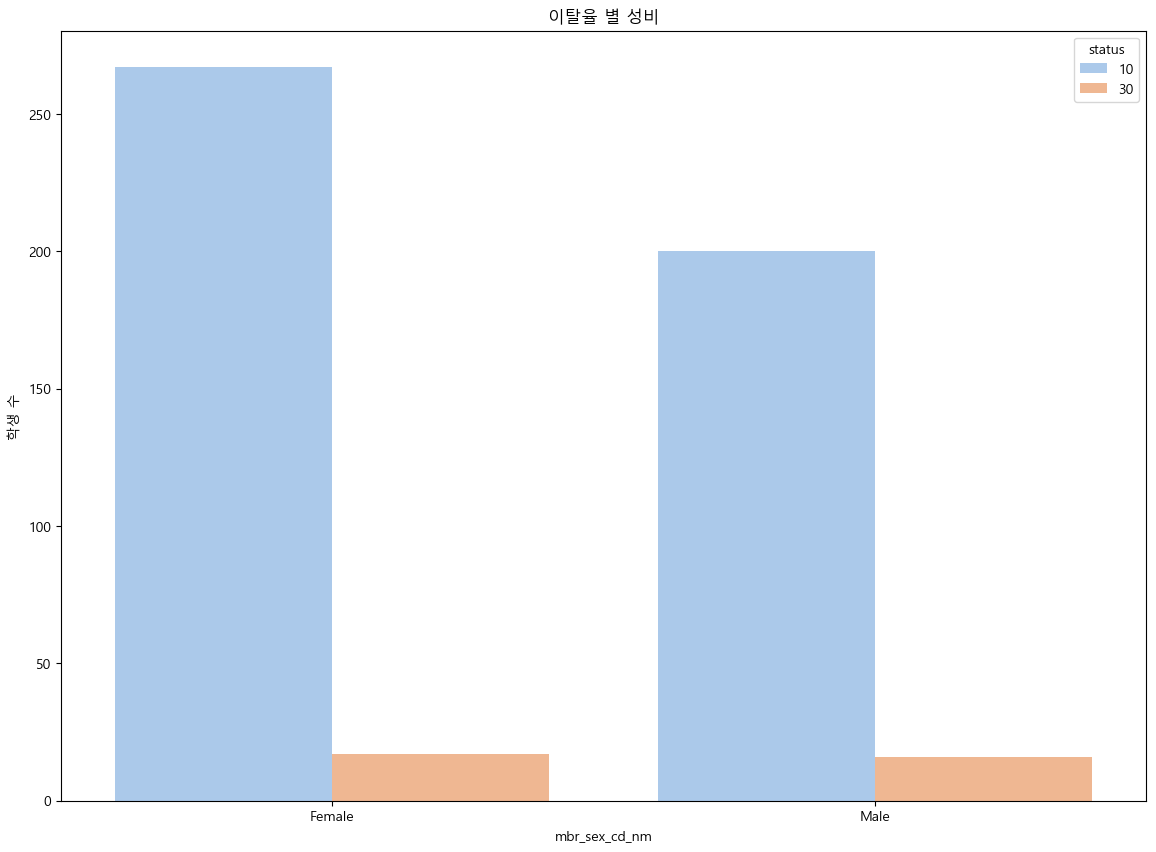

In [33]:
sns.countplot(data = df_vis, x = 'mbr_sex_cd_nm', hue = 'status', palette='pastel')  # hue_order = ['Dropout', 'Enrolled', 'Graduate'], 
plt.xticks(ticks = [0, 1], labels = ['Female', 'Male'])
plt.ylabel('학생 수')
plt.title('이탈율 별 성비')
plt.show()

In [34]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn import preprocessing

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, classification_report

import copy
import random

### Label Encoding

In [35]:
df.columns

Index(['userid', 'mbr_sex_cd_nm', 'mbr_step_cd_nm', 'mbr_status_cd_nm',
       'grade_sect_cd', 'status', 'proc_ymd_x', 'mcode', 'completed_yn',
       'assessment_completed_yn', 'media_completed_yn', 'system_learning_time',
       'restart_cnt', 'score', 'item_cnt', 'quizcode_cnt', 'correct_cnt',
       'solved_time_sum', 'solved_time_avg', 'proc_ymd_y', 'media_action_cnt',
       'non_video_viewed_cnt', 'video_start_cnt', 'video_restart_cnt',
       'video_pause_cnt', 'video_jump_cnt', 'video_resume_cnt',
       'video_speed_cnt', 'video_volume_cnt', 'video_end_cnt'],
      dtype='object')

In [36]:
# modeling df 만들기
df_m = copy.deepcopy(df)
df_m = df_m.drop(columns = {'userid', 'proc_ymd_x', 'proc_ymd_y'})

In [37]:
df_m['status'] = df_m['status'].apply(lambda x : str(x).replace('10', '1'))
df_m['status'] = df_m['status'].apply(lambda x : str(x).replace('30', '0'))

In [38]:
# obj float 나누기
obj_lst = list(df_m.select_dtypes(object).columns)
int_lst = list(df_m.select_dtypes(float).columns)

In [39]:
encoder = LabelEncoder()

# object type 열만 추출 후 labelencoding
for i in obj_lst:
    df_m[i] = encoder.fit_transform(df_m[i])

In [40]:
df_m.status.value_counts()

1    42776
0     2655
Name: status, dtype: int64

### train_test_split을 사용하지 않은 데이터 분리
- train_test_split을 사용하지 않고, 코드 작성을 통해 train/test & input/target 데이터 분리

In [41]:
df_i = copy.deepcopy(df)

In [42]:
ID_list = df['userid']

In [43]:
# 최종 학습 데이터에서 userid 변수를 따로 추출해서 ID 데이터프레임 생성

ID_list_train = pd.DataFrame(ID_list)

In [44]:
# userid를 set을 사용하여 중복제거 후 리스트로 반환


In [45]:
# 반환된 ID 리스트를 train : test = 400명 : 100명으로 나눈 후, 두개의 리스트를 데이터프레임 형태로 변환


In [46]:
# train 데이터에 해당하는 userid와 일치하는 데이터 갖고 오기


# test 데이터에 해당하는 userid와 일치하는 데이터 갖고 오기


In [47]:
# train 데이터의 userid 리스트

# test 데이터의 userid 리스트


# train 데이터의 input 데이터

# test 데이터의 input 데이터


# train 데이터의 target 데이터

# test 데이터의 target 데이터


### train 데이터에 fit_transform / test 데이터 transform 적용

In [48]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

In [49]:
X = df_m.drop('status', axis=1)
y = df_m['status']

In [50]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45431 entries, 0 to 45430
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mbr_sex_cd_nm            45431 non-null  int32  
 1   mbr_step_cd_nm           45431 non-null  int32  
 2   mbr_status_cd_nm         45431 non-null  int32  
 3   grade_sect_cd            45431 non-null  int32  
 4   status                   45431 non-null  int32  
 5   mcode                    45431 non-null  int32  
 6   completed_yn             45431 non-null  int32  
 7   assessment_completed_yn  45431 non-null  int32  
 8   media_completed_yn       45431 non-null  int32  
 9   system_learning_time     45431 non-null  float64
 10  restart_cnt              45431 non-null  float64
 11  score                    45431 non-null  float64
 12  item_cnt                 45431 non-null  float64
 13  quizcode_cnt             45431 non-null  float64
 14  correct_cnt           

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 777, shuffle=False)

In [52]:
scaler = preprocessing.MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

In [53]:
# 모델 불러오기, 정의
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
# xgb = xgb.XGBClassifier()
lgb = lgb.LGBMClassifier()

# 학습 데이터로 모델 학습
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
# xgb.fit(X_train, y_train)
lgb.fit(X_train, y_train)

# 학습된 모델로 test 결과값 출력
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
# xgb_pred = xgb.predict(X_test)
lgb_pred = lgb.predict(X_test)

### 최종 예측을 위한 데이터셋 생성

- 데이터셋 포맷
-> ID + 실제 이탈 여부 변수 + 모델 예측 결과

In [54]:
df.loc[y_test.index, 'userid']

36344    1b3c11df-f807-4a33-beb3-1d498178cf7e
36345    1b3c11df-f807-4a33-beb3-1d498178cf7e
36346    1b3c11df-f807-4a33-beb3-1d498178cf7e
36347    1b3c11df-f807-4a33-beb3-1d498178cf7e
36348    1b3c11df-f807-4a33-beb3-1d498178cf7e
                         ...                 
45426    1382f041-8f81-49ec-ae87-f5bc95423f0e
45427    1382f041-8f81-49ec-ae87-f5bc95423f0e
45428    1382f041-8f81-49ec-ae87-f5bc95423f0e
45429    41cb25c4-23a0-4750-9868-6ef9745aecaa
45430    41cb25c4-23a0-4750-9868-6ef9745aecaa
Name: userid, Length: 9087, dtype: object

In [55]:
result_df_dt = pd.DataFrame({'userid': df.loc[y_test.index, 'userid'], 'status' : y_test, 'pred' : dt_pred})
result_df_rf = pd.DataFrame({'userid': df.loc[y_test.index, 'userid'], 'status' : y_test, 'pred' : rf_pred})
# result_df_xgb = pd.DataFrame({'userid': df.loc[y_test.index, 'userid'], 'status' : y_test, 'pred' : xgb_pred})
result_df_lgb = pd.DataFrame({'userid': df.loc[y_test.index, 'userid'], 'status' : y_test, 'pred' : lgb_pred})

In [56]:
display(result_df_dt)
print(result_df_dt.pred.value_counts())
display(result_df_rf)
print(result_df_rf.pred.value_counts())
display(result_df_lgb)
print(result_df_lgb.pred.value_counts())

,userid,status,pred
36344,1b3c11df-f807-4a33-beb3-1d498178cf7e,1,1
36345,1b3c11df-f807-4a33-beb3-1d498178cf7e,1,1
36346,1b3c11df-f807-4a33-beb3-1d498178cf7e,1,1
36347,1b3c11df-f807-4a33-beb3-1d498178cf7e,1,1
36348,1b3c11df-f807-4a33-beb3-1d498178cf7e,1,1
...,...,...,...
45426,1382f041-8f81-49ec-ae87-f5bc95423f0e,0,1
45427,1382f041-8f81-49ec-ae87-f5bc95423f0e,0,1
45428,1382f041-8f81-49ec-ae87-f5bc95423f0e,0,1
45429,41cb25c4-23a0-4750-9868-6ef9745aecaa,1,1


1    8683
0     404
Name: pred, dtype: int64


,userid,status,pred
36344,1b3c11df-f807-4a33-beb3-1d498178cf7e,1,1
36345,1b3c11df-f807-4a33-beb3-1d498178cf7e,1,1
36346,1b3c11df-f807-4a33-beb3-1d498178cf7e,1,1
36347,1b3c11df-f807-4a33-beb3-1d498178cf7e,1,1
36348,1b3c11df-f807-4a33-beb3-1d498178cf7e,1,1
...,...,...,...
45426,1382f041-8f81-49ec-ae87-f5bc95423f0e,0,1
45427,1382f041-8f81-49ec-ae87-f5bc95423f0e,0,1
45428,1382f041-8f81-49ec-ae87-f5bc95423f0e,0,1
45429,41cb25c4-23a0-4750-9868-6ef9745aecaa,1,1


1    9084
0       3
Name: pred, dtype: int64


,userid,status,pred
36344,1b3c11df-f807-4a33-beb3-1d498178cf7e,1,1
36345,1b3c11df-f807-4a33-beb3-1d498178cf7e,1,1
36346,1b3c11df-f807-4a33-beb3-1d498178cf7e,1,1
36347,1b3c11df-f807-4a33-beb3-1d498178cf7e,1,1
36348,1b3c11df-f807-4a33-beb3-1d498178cf7e,1,1
...,...,...,...
45426,1382f041-8f81-49ec-ae87-f5bc95423f0e,0,1
45427,1382f041-8f81-49ec-ae87-f5bc95423f0e,0,1
45428,1382f041-8f81-49ec-ae87-f5bc95423f0e,0,1
45429,41cb25c4-23a0-4750-9868-6ef9745aecaa,1,1


1    9080
0       7
Name: pred, dtype: int64


In [57]:
result_df_lgb.drop_duplicates(['userid'])

,userid,status,pred
36344,1b3c11df-f807-4a33-beb3-1d498178cf7e,1,1
36571,4e0831d6-009c-4dd9-96f6-36553b7e1ca1,1,1
36666,691f1f54-95c8-469d-8e79-8187a148e994,1,1
36678,cbd08883-0702-42a6-b62e-fd2186dbdd9e,1,1
36805,4b2d1d1b-4b7e-4b97-8c5d-f73a6535f11e,1,1
...,...,...,...
45027,c71520ab-7d7e-48d5-b2b9-bb090f43e150,1,1
45120,13fe4c74-f903-48a4-8ae3-c83bef923c03,1,1
45197,c8c0eec6-b0bd-44f1-866b-6503d7e7287f,1,1
45338,1382f041-8f81-49ec-ae87-f5bc95423f0e,0,1


### userid별 일별 이탈로 예측된 비율이 n%보다 높을 경우 이탈로 예측

In [58]:
def get_final_result(result_df, num):
    '''
    각 userid별로 이탈로 예측한 비율에 따라 예측값 변환
    '''
    result_df = result_df[['userid', 'status', 'pred']]
    USER_ID = result_df.drop_duplicates(['userid']).reset_index(drop = True)
    USER_ID = USER_ID[['userid', 'status']]

    pred_group = result_df.groupby(['userid', 'pred']).count().reset_index()
    # 각 userid별로 이탈/미이탈로 예측한 count의 비율 계산 -> 이탈로 예측한 count / 전체 action count
    pred_group['ratio'] = pred_group.groupby(['userid'])['status'].apply(lambda x : x/x.sum())

    # 각 userid별로 이탈로 예측한 비율만 반환 (단, 이탈로 예측한 case가 없을 경우, 미이탈로 예측한 비율을 대신 반환)
    pred_group = pred_group.sort_values(['userid', 'pred'], ascending = [True, False]).drop_duplicates(['userid'], keep = 'first')

    # 미이탈로 100% 예측헀다면 이탈로 예측한 확률을 0%으로 계산 (1.00 - 1.00)%
    pred_group['ratio_re'] = pred_group[['pred', 'ratio']].apply(lambda x : x['ratio'] if x['pred'] == 30 else float(1 - x['ratio']), axis = 1)
    pred_group = pred_group[['userid', 'pred', 'ratio_re']]

    # 일정 비율 이상 이탈로 예측했을 경우, 이탈로 변환
    pred_group['pred'] = pred_group.apply(lambda x : 30 if x['ratio_re'] >= num else 10, axis = 1)
    pred_group = pred_group[['userid', 'pred']]

    test_result = pd.merge(USER_ID, pred_group, on = 'userid', how = 'left')

    return test_result

In [59]:
final_dt = get_final_result(result_df_dt, 30)
final_rf = get_final_result(result_df_rf, 30)
final_lgb = get_final_result(result_df_lgb, 30)

C:\Users\hslio\AppData\Local\Temp\ipykernel_12604\688127460.py:11: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  pred_group['ratio'] = pred_group.groupby(['userid'])['status'].apply(lambda x : x/x.sum())
C:\Users\hslio\AppData\Local\Temp\ipykernel_12604\688127460.py:11: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(...

In [60]:
print(final_dt.pred.value_counts())
print(final_rf.pred.value_counts())
print(final_lgb.pred.value_counts())

10    93
Name: pred, dtype: int64
10    93
Name: pred, dtype: int64
10    93
Name: pred, dtype: int64


## 모델 성능 평가

In [61]:
# y_test = final['status']
# y_pred = final['pred']

# y_test = result_df['status']
# y_pred = result_df['pred']

In [62]:
model_lst = ['Decision Tree', 'Random Forest', 'LightGBM']
pred_lst = [dt_pred, rf_pred, lgb_pred]
parm = ['micro', 'macro', 'weighted']

In [63]:
# 정확도
for pred, tt in zip(pred_lst, model_lst):
    print('\33[91m' + tt + '\033[0m')
    accuracy = accuracy_score(y_test, pred)
    print("Accuracy:", accuracy)
    print()

Decision Tree
Accuracy: 0.924837680202487

Random Forest
Accuracy: 0.9658853306921976

LightGBM
Accuracy: 0.9654451414108066



In [64]:
for pred, m in zip(pred_lst, model_lst):
    print('\33[91m' + m + '\033[0m')
    for i in parm:    
        precision = precision_score(y_test, pred, average=i)
        recall = recall_score(y_test, pred, average=i) 
        f1 = f1_score(y_test, pred, average=i)

        print('🔻')
        print(i)
        print("Precision:", precision)
        print("Recall:", recall)
        print("F1 Score:", f1)
        print()
        print('='*50)

Decision Tree
🔻
micro
Precision: 0.924837680202487
Recall: 0.924837680202487
F1 Score: 0.924837680202487

🔻
macro
Precision: 0.5004546838422181
Recall: 0.5005917357334184
F1 Score: 0.5001349447451404

🔻
weighted
Precision: 0.9347821543290593
Recall: 0.924837680202487
F1 Score: 0.929756038051026

Random Forest
🔻
micro
Precision: 0.9658853306921976
Recall: 0.9658853306921976
F1 Score: 0.9658853306921976

🔻
macro
Precision: 0.48310215763980624
Recall: 0.4998291571753986
F1 Score: 0.49132333184057325

🔻
weighted
Precision: 0.9335615591674917
Recall: 0.9658853306921976
F1 Score: 0.9494484105998092

LightGBM
🔻
micro
Precision: 0.9654451414108066
Recall: 0.9654451414108066
F1 Score: 0.9654451414108066

🔻
macro
Precision: 0.4830947136563877
Recall: 0.4996013667425968
F1 Score: 0.4912094064949608

🔻
weighted
Precision: 0.9335471741835772
Recall: 0.9654451414108066
F1 Score: 0.9492282577364929



In [65]:
for pred, m in zip(pred_lst, model_lst):
    # y_test = y_test.astype(int).tolist()
    pred = pred.astype(int).tolist()

    print('\33[91m' + m + '\033[0m')
    model_report = classification_report(y_test, pred)
    print(model_report)

Decision Tree
              precision    recall  f1-score   support

           0       0.03      0.05      0.04       307
           1       0.97      0.96      0.96      8780

    accuracy                           0.92      9087
   macro avg       0.50      0.50      0.50      9087
weighted avg       0.93      0.92      0.93      9087

Random Forest
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       307
           1       0.97      1.00      0.98      8780

    accuracy                           0.97      9087
   macro avg       0.48      0.50      0.49      9087
weighted avg       0.93      0.97      0.95      9087

LightGBM
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       307
           1       0.97      1.00      0.98      8780

    accuracy                           0.97      9087
   macro avg       0.48      0.50      0.49      9087
weighted avg       0.93      0.97    

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [86]:
y_test

36344    1
36345    1
36346    1
36347    1
36348    1
        ..
45426    0
45427    0
45428    0
45429    1
45430    1
Name: status, Length: 9087, dtype: int32

In [87]:
len(dt_pred)

9087

Decision Tree


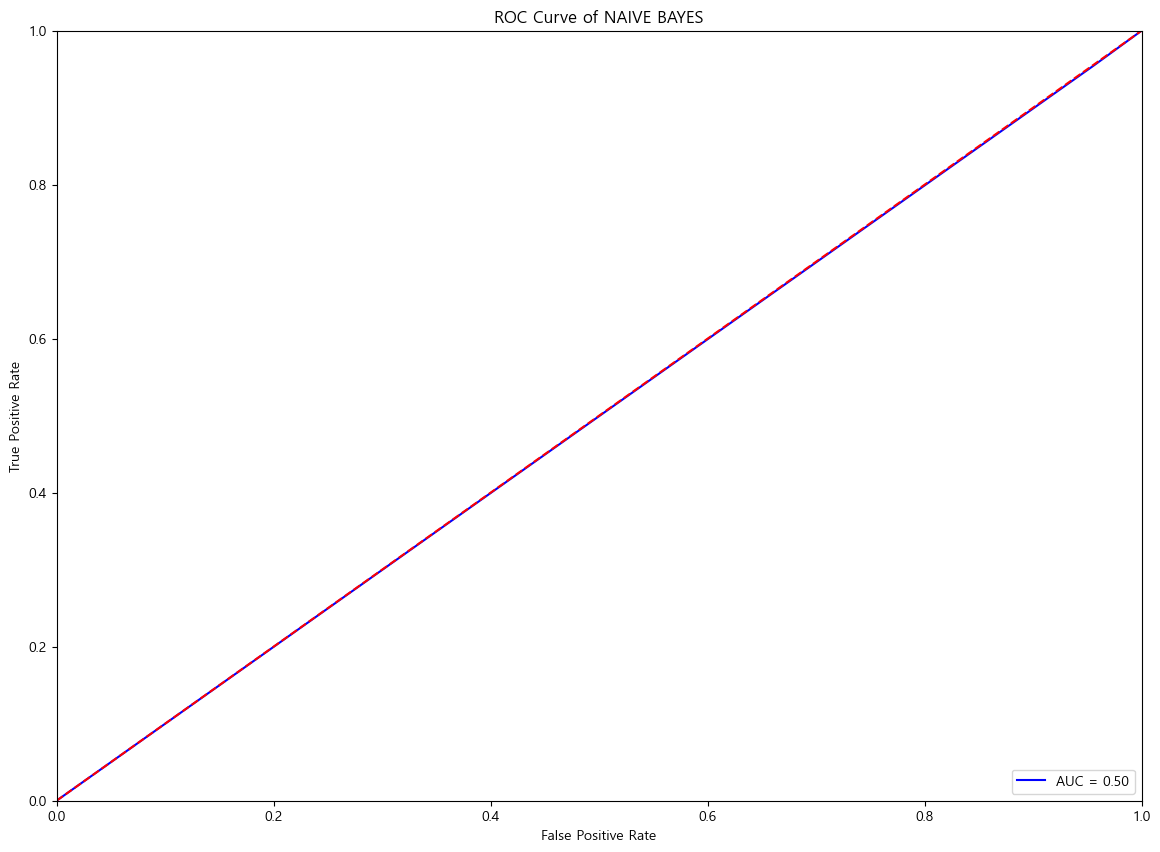

Random Forest


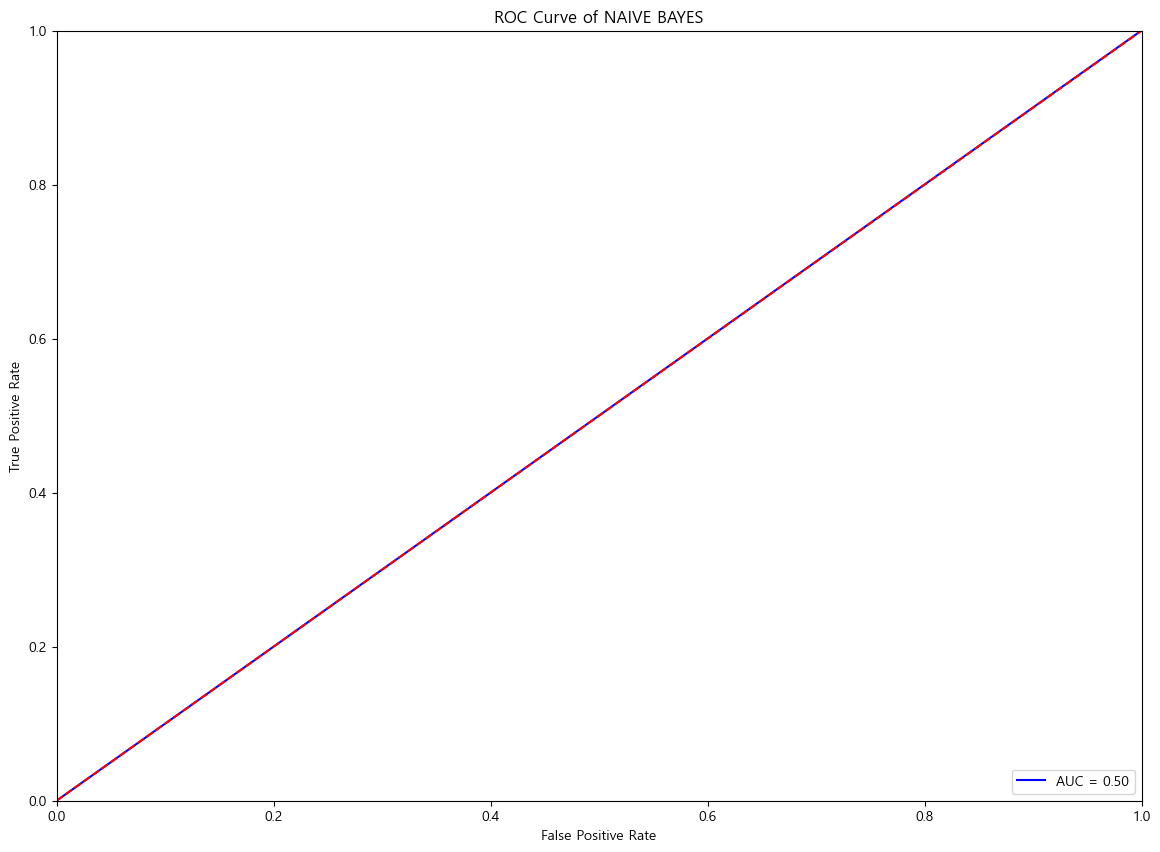

LightGBM


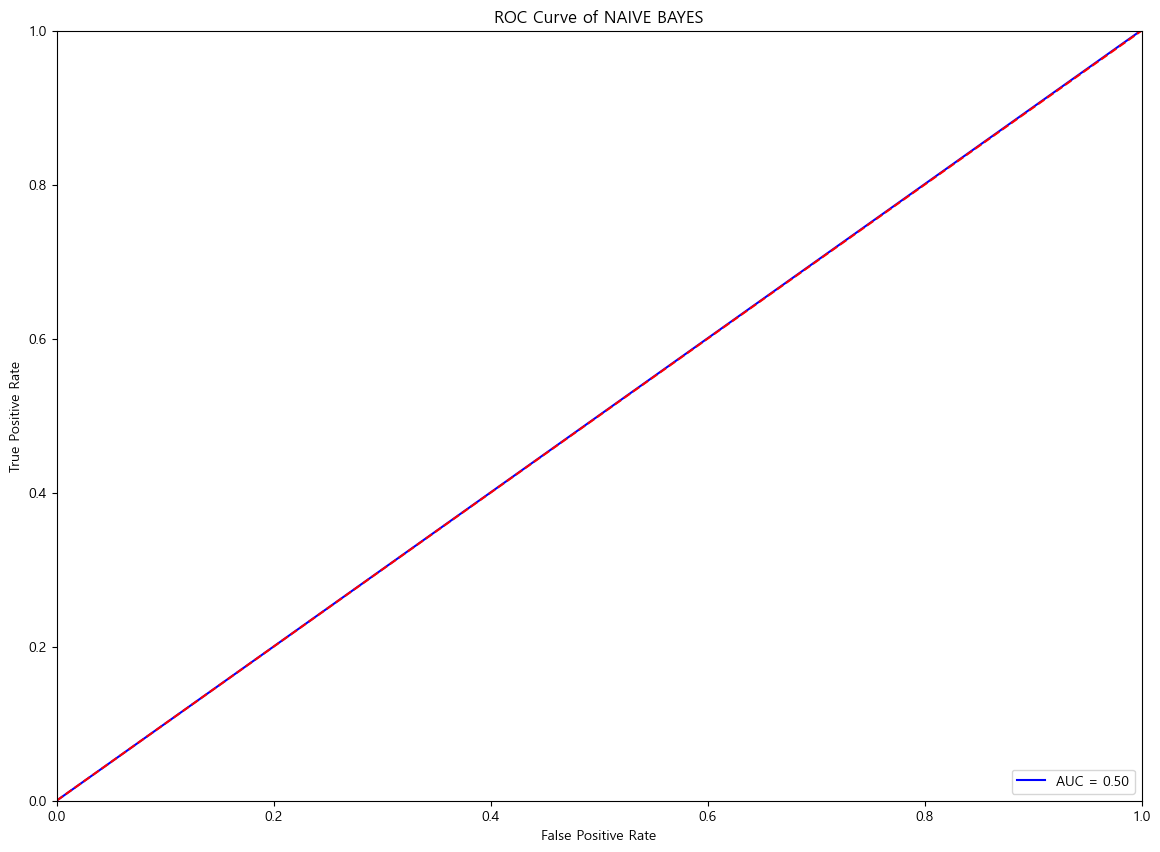

In [92]:
for gg,tt in zip(pred_lst, model_lst):
    print('\33[91m' + tt + '\033[0m')
    # Compute ROC curve and area under the curve (AUC)
    fpr, tpr, thresholds = roc_curve(y_test, gg, pos_label=0)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.title('Decision Tree Classifier')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('ROC Curve of NAIVE BAYES')
    plt.show()